# Theory
Lightweight (Bayesian) Marketing Mix Modeling is used to solve the use case. Please refer to this [site](https://lightweight-mmm.readthedocs.io/en/latest/models.html) for more detailed information.
* An MMM quantifies the relationship between media channel activity and conversion, while controlling for other factors. A simplified model overview is shown below:

$$response_t = \alpha + trend_t + seasonality_t + media\_channels_t + other\_factors_t$$

Let's break down each component in the equation:

- **α**: This component represents the intercept or the baseline value of the response. It is the expected value of the response when all other factors are zero.

- **trend**: This component captures the increasing or decreasing trend of the response over time.

- **seasonality**: This component represents periodic fluctuations in the response.

- **media_channels**: This component accounts for the influence of media channels (TV, search, online ads) on the response.

- **other_factors**: This component encompasses any other variables that have influence on the response, such as weather, economic indicators, or competitor activities.


In [6]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation

## Media Channels

The variable media channels represents the transformed media channels at time point t. It is obtained by applying a transformation to the raw media channel value x​.

$$
media\_channels_t = \frac{1}{1 + \left(\frac{x^*_{t,m}}{K_m}\right)^{-S_m}}
$$

$$
x^*_{t,m} = x_{t,m} + \lambda x^*_{t-1,m} \quad \text{where } t = 2, \dots, N
$$

$$
x^*_{1,m} = x_{1,m}
$$

$$
K_m \sim Gamma(1,1)
$$

$$
S_m \sim Gamma(1,1)
$$

$$
\lambda_m \sim Beta(2,1)
$$


In these equations, we are modeling the media channels’ behavior using a series of transformations, such as geometric adstock and Hill saturation.

### Geometric adstock

Controls the adstock effect, determining how much the impact of marketing spend decays over time. 
* Parameter: λ

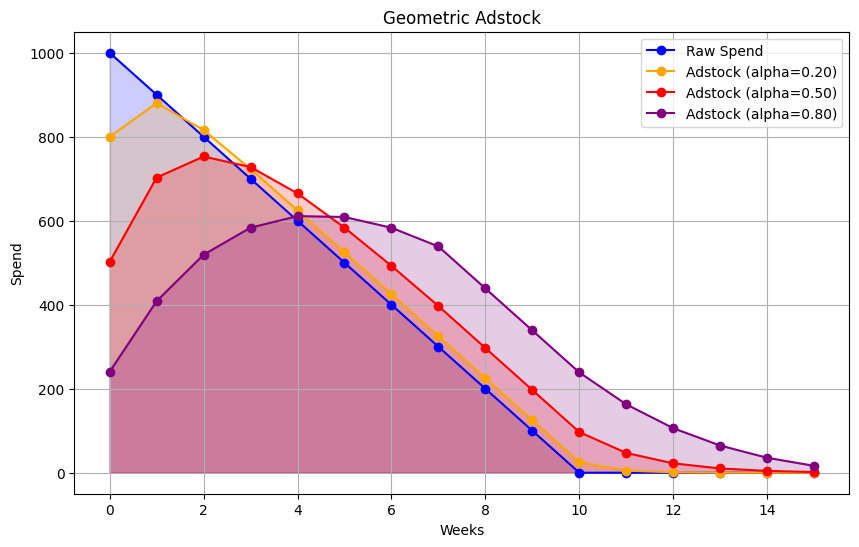

In [7]:
raw_spend = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100, 0, 0, 0, 0, 0, 0])

adstock_spend_1 = geometric_adstock(x=raw_spend, alpha=0.20, l_max=8, normalize=True).eval().flatten()
adstock_spend_2 = geometric_adstock(x=raw_spend, alpha=0.50, l_max=8, normalize=True).eval().flatten()
adstock_spend_3 = geometric_adstock(x=raw_spend, alpha=0.80, l_max=8, normalize=True).eval().flatten()

plt.figure(figsize=(10, 6))

plt.plot(raw_spend, marker='o', label='Raw Spend', color='blue')
plt.fill_between(range(len(raw_spend)), 0, raw_spend, color='blue', alpha=0.2)

plt.plot(adstock_spend_1, marker='o', label='Adstock (alpha=0.20)', color='orange')
plt.fill_between(range(len(adstock_spend_1)), 0, adstock_spend_1, color='orange', alpha=0.2)

plt.plot(adstock_spend_2, marker='o', label='Adstock (alpha=0.50)', color='red')
plt.fill_between(range(len(adstock_spend_2)), 0, adstock_spend_2, color='red', alpha=0.2)

plt.plot(adstock_spend_3, marker='o', label='Adstock (alpha=0.80)', color='purple')
plt.fill_between(range(len(adstock_spend_3)), 0, adstock_spend_3, color='purple', alpha=0.2)

plt.xlabel('Weeks')
plt.ylabel('Spend')
plt.title('Geometric Adstock')
plt.legend()
plt.grid(True)
plt.show()

### Hill Saturation

The Hill transformation is controlled by the parameters K​ a half saturation point (0 < k ≤ 1), and shape S​ controlling the steepness of the curve (s > 0).

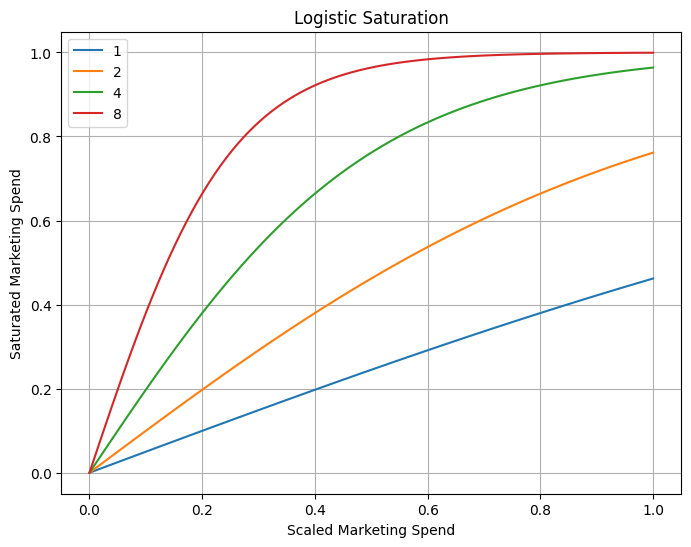

In [9]:
scaled_spend = np.linspace(start=0.0, stop=1.0, num=100)

saturated_spend_1 = logistic_saturation(x=scaled_spend, lam=1).eval()
saturated_spend_2 = logistic_saturation(x=scaled_spend, lam=2).eval()
saturated_spend_4 = logistic_saturation(x=scaled_spend, lam=4).eval()
saturated_spend_8 = logistic_saturation(x=scaled_spend, lam=8).eval()

plt.figure(figsize=(8, 6))
sns.lineplot(x=scaled_spend, y=saturated_spend_1, label="1")
sns.lineplot(x=scaled_spend, y=saturated_spend_2, label="2")
sns.lineplot(x=scaled_spend, y=saturated_spend_4, label="4")
sns.lineplot(x=scaled_spend, y=saturated_spend_8, label="8")

plt.title('Logistic Saturation')
plt.xlabel('Scaled Marketing Spend')
plt.ylabel('Saturated Marketing Spend')
plt.grid(True)
plt.show()